In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [7]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [8]:
X

array([[-4.60551435,  5.34133821],
       [-9.65196978,  6.9982505 ],
       [-9.76503103,  7.23818796],
       ...,
       [-4.18317029,  3.58709471],
       [ 6.2994492 ,  5.61424011],
       [-9.39567111,  9.59101885]], shape=(1000, 2))

In [9]:
y

array([0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1,
       1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0,

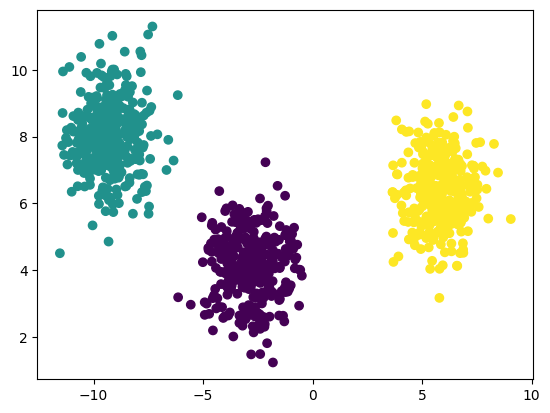

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
# feature scaling technique ---> Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [ ]:
## elbow method
wcss =[]
